In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
import pickle
import matplotlib.tri as tri

# Add source file paths
import os
path = os.path.abspath(os.getcwd())
os.chdir("..")
parent_path = os.path.abspath(os.getcwd())

import sys 
sys.path.insert(1, parent_path + '\\source')

from data_helper import pde_exact

$\lambda \Delta u = u(u^2 -1) = f, t \times x \in [0,1] \times [0,1]$ <br>

In [2]:
def rand_coeff():
    n = 5
    c_i = np.random.rand(n)
    c1 = c_i[0]; c2 = c_i[1]; c3 = c_i[2]; c4 = c_i[3]; c5 = c_i[4];
    return c1, c2, c3, c4, c5

exact = pde_exact()

In [3]:
N = 51; M = 51; num = 100

x = np.linspace(0, 1, N); y = np.linspace(0, 1, M);
u_ls = []; f_ls = []; c_ls = []
for i in range(num):
    c1, c2, c3, c4, c5 = rand_coeff()
    u_vals, f_vals = exact.allen_cahn_2d(c1, c2, c3, c4, c5, N, M)
    u_ls.append(u_vals); f_ls.append(f_vals);
    c_ls.append(np.array([c1, c2, c3, c4, c5]))

In [4]:
# Means and stf for plotting
mean_u = np.mean(np.array(u_ls),0)
mean_f = np.mean(np.array(f_ls),0)
std_u = np.std(np.array(u_ls),0)
std_f = np.std(np.array(f_ls),0)

X, Y = np.meshgrid(x,y)
triang = tri.Triangulation(X.flatten(), Y.flatten())

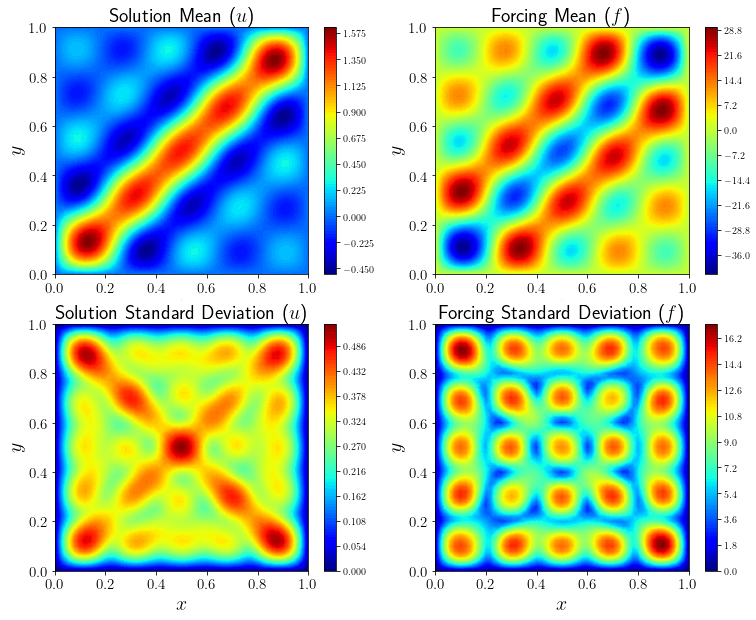

In [5]:
# Plot
plt.figure(figsize = (12.5,10))
plt.rcParams['text.usetex'] = True;


plt.subplot(2,2,1);
plt.tricontourf(triang, mean_u.flatten(), 100, cmap = 'jet')
plt.subplot(2,2,2);
plt.tricontourf(triang, mean_f.flatten(), 100, cmap = 'jet')
plt.subplot(2,2,3);
plt.tricontourf(triang, std_u.flatten(), 100, cmap = 'jet')
plt.subplot(2,2,4);
plt.tricontourf(triang, std_f.flatten(), 100, cmap = 'jet')

plt.subplot(2,2,1);
plt.ylabel(r'$y$', fontsize=20); plt.xlabel(r'$x$', fontsize=0); plt.title(r'Solution Mean ($u$)', fontsize=20);
plt.xticks(fontsize=15); plt.yticks(fontsize=15); plt.colorbar()
plt.subplot(2,2,2);
plt.ylabel(r'$y$', fontsize=20); plt.xlabel(r'$x$', fontsize=0); plt.title(r'Forcing Mean ($f$)', fontsize=20);
plt.xticks(fontsize=15); plt.yticks(fontsize=15); plt.colorbar()
plt.subplot(2,2,3);
plt.ylabel(r'$y$', fontsize=20); plt.xlabel(r'$x$', fontsize=20); plt.title(r'Solution Standard Deviation ($u$)', fontsize=20);
plt.xticks(fontsize=15); plt.yticks(fontsize=15); plt.colorbar()
plt.subplot(2,2,4);
plt.ylabel(r'$y$', fontsize=20); plt.xlabel(r'$x$', fontsize=20); plt.title(r'Forcing Standard Deviation ($f$)', fontsize=20);
plt.xticks(fontsize=15); plt.yticks(fontsize=15); plt.colorbar()

plt.savefig(path + '\\allencahn_data', dpi = 300, bbox_inches='tight')

In [6]:
# Save data
diffrea1D_dict = {'x': x, 'y': y, 'u': u_ls, 'f': f_ls, 'c': c_ls}

with open(path + '/allenCahn2D_dict.pickle', 'wb') as handle:
    pickle.dump(diffrea1D_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)